In [15]:
from PIL import Image
from memory import VPTModel, SituationLoader, Memory

In [2]:
in_model = "data/VPT-models/foundation-model-1x.model"
in_weights = "data/VPT-models/foundation-model-1x.weights"

In [3]:
vpt = VPTModel(in_model)
expert_dataloader = SituationLoader(vpt)

In [4]:
demonstrations = expert_dataloader.load_demonstrations(num_demos=1)

Loading expert demonstrations:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
encoded_demos = expert_dataloader.encode_demonstrations(demonstrations)

Encoding expert demonstrations:   0%|          | 0/1 [00:00<?, ?it/s]

Encoding Trajectory:   0%|          | 0/1359 [00:00<?, ?it/s]

In [6]:
situations = expert_dataloader.create_situations(encoded_demos)

Creating situations:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
memory = Memory()

In [8]:
memory.create_index(situations)

In [9]:
memory.save_index(save_dir="data")

In [10]:
memory.load_index('data/memory.json')

In [11]:
query = situations[0]["situation"]

In [13]:
res = memory.search(query)
res

[{'demo_id': 'Player731-aa8e694cdce5-20220707-113559',
  'situation_idx': 128,
  'distance': 0.0},
 {'demo_id': 'Player731-aa8e694cdce5-20220707-113559',
  'situation_idx': 168,
  'distance': 995.3345},
 {'demo_id': 'Player731-aa8e694cdce5-20220707-113559',
  'situation_idx': 178,
  'distance': 1024.1199},
 {'demo_id': 'Player731-aa8e694cdce5-20220707-113559',
  'situation_idx': 158,
  'distance': 1031.7958}]

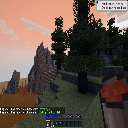

In [21]:
Image.fromarray(demonstrations[0]["video"][res[0]["situation_idx"]])

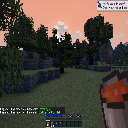

In [24]:
Image.fromarray(demonstrations[0]["video"][res[3]["situation_idx"]])